### Weekly 2 
<br>
First we import the libraries and datasets. We print the first entries to have a quick look at the dataset.

In [14]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs

#data set 1
df_steps = pd.read_csv('steps.csv',sep=";")
df_steps.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#data set 2
df_survey = pd.read_csv('survey.csv', sep=",")
df_survey.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


For convience, we merge the dataframes into one main dataframe.

In [16]:
#data sets merged

df = pd.merge(df_steps, df_survey, on = 'id') 
df = df.fillna(0)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


We start off with the quick creation of a column depicting the mean steps per participant. This way, we can more easily compare between the participants.

In [17]:
df['mean'] = df.loc[:, '20-6-2013':'13-5-2014'].mean(numeric_only=True, axis=1)

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,0.0,0.0,0.0,0.0,3941.0,15733.0,9929.0,12879.0,10541.0,...,0.0,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,5133.875000
1,2,0.0,0.0,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,0.0,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,2826.371951
2,3,0.0,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,0.0,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,3745.902439
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,221.536585
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,874.557927


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


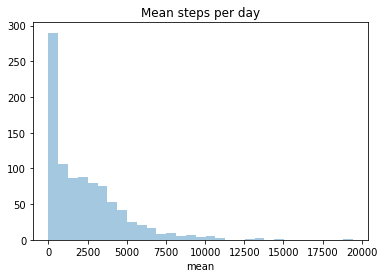

In [18]:
sns.distplot(df["mean"], kde=False) 
plt.title('Mean steps per day')
plt.show()

From the graph we can see that most participants have a rather low mean steps per day, with some outliers. 

We clean some of the data because it would otherwise interfere with the performance of the model. Some numbers do not realistically appear in real test cases. We clean those out of the dataframe.

In [21]:
#cleaning weight
#too high
def below_200(x):
    if(x > 200.0): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(below_200)

#too low
def above_30(x):
    if(x < 30): 
        return float('NaN')
    else: 
        return x
df['weight'] = df['weight'].apply(above_30)

In [22]:
#cleaning height
#too low
def below_100(x):
    if(x < 100): 
        return float('NaN')
    else: 
        return x
df['height'] = df['height'].apply(below_100)

Now we will compare the variables and have a closer look at their relation with the mean steps per day. We use a simple scatterplot for the quick visualisation of the relation between the variables.

In [23]:
df_sub = df[["mean", "height", "weight"]]
print(df_sub)

            mean  height  weight
0    5133.875000   178.0    98.0
1    2826.371951   180.0    77.0
2    3745.902439   180.0    83.0
3     221.536585   178.0    80.0
4     874.557927   167.0    61.0
..           ...     ...     ...
924  1742.908537   165.0    59.0
925   731.689024   192.0    90.0
926  6268.954268   181.0    71.0
927  3872.115854   172.0    65.0
928  3167.902439   180.0    76.0

[929 rows x 3 columns]


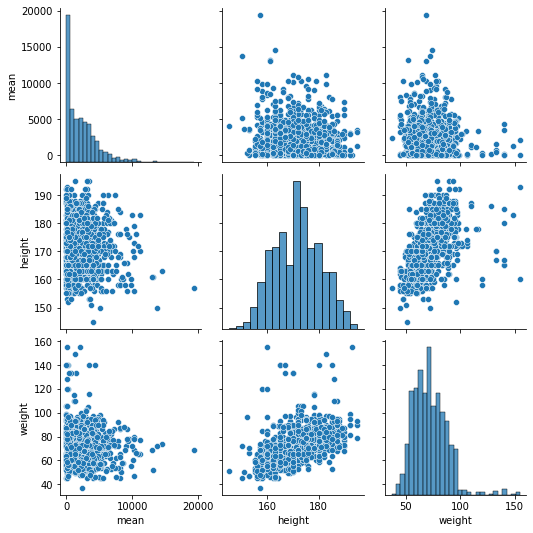

In [24]:
sns.pairplot(df_sub)
plt.show()

There seems to be a person with the outlier number on the mean steps per day. We can see that the person has a mean of almost 20 000 steps per day. While definitely an outlier, we do not clean that person out of the dataframe. Considering professions and athletes, it could be a true number.

We will dive further into the relation between the two variables and the mean steps. We do this through scatterplotting.

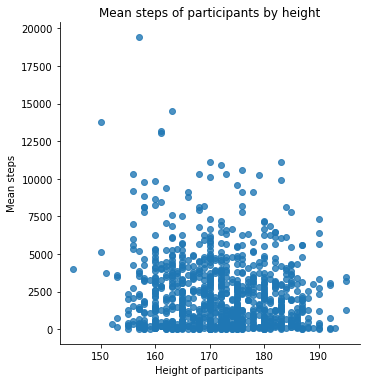

In [25]:
sns.lmplot(x='height', y="mean", fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Height of participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Mean steps of participants by height')
plt.show()

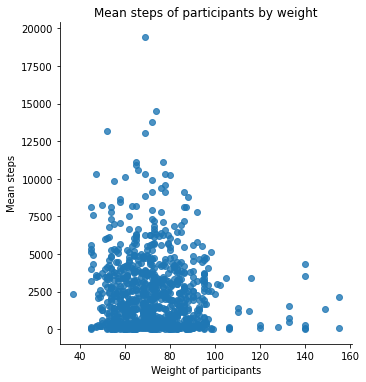

In [26]:
sns.lmplot(x='weight', y="mean", fit_reg=False, data=df) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Weight of participants') #use matplotlib to refine Seaborn plot
plt.ylabel('Mean steps')
plt.title('Mean steps of participants by weight')
plt.show()

We create a quick Pearson's R. This describes the correlation between the different variables. 

In [27]:
from scipy.stats.stats import pearsonr 

df = df.fillna(0)

print(pearsonr(df['mean'],df['height']))
print(pearsonr(df['mean'],df['weight']))

(-0.06331764298206506, 0.053702574636943876)
(-0.10846600797317424, 0.0009285942519267825)


When analyzing mean and height, the output gives us two numbers: r which is -0.063, and p which is 0.053. The relation between mean and weight returns r= 0,105 and p= 0.001. We can thus conclude the following:<br><br>
Mean and height<br>
The mean and height are very weak to not correlated (r = -0.063) With the p value (p = 0.053) the relation is significant.
<br><br>
Mean and weight<br>
For the mean steps and weight of participants there exists a weak negative linear correlation (r = -0.10). With the p value (p = 0.001) the relation is significant.
I was also interested to plot the mean steps per participant in relation to age.

A quick comparison now between the different age groups. We can see that the mid age categories have the highest step counts.

Text(0.5, 1.0, 'Comparing Age and Mean steps per participant in boxplot')

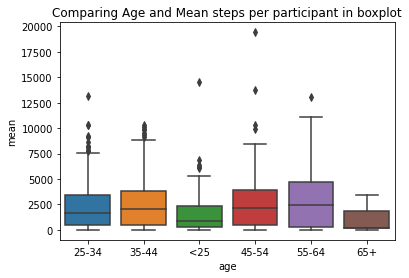

In [28]:
sns.boxplot(data = df, y="mean",x="age")
plt.title('Comparing Age and Mean steps per participant in boxplot')

Another comparison between gender and mean steps per day. It is curious to that females step more than men.

Text(0.5, 1.0, 'Comparing mean steps per participant by gender through violin plot')

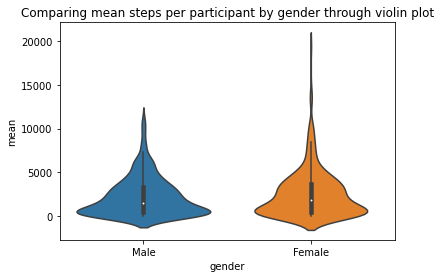

In [29]:
sns.violinplot(data=df, x="gender", y="mean")
plt.title('Comparing mean steps per participant by gender through violin plot')

Another interesting comparison can be made with the gender and city variables. We can clearly see that both men and women from Lille walk significantly more than other cities.

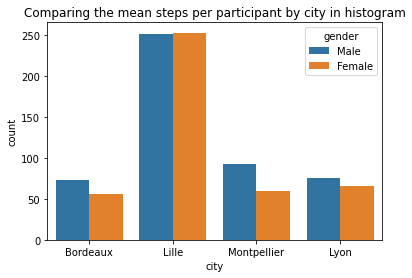

In [31]:
sns.countplot(x="city", hue="gender", data=df)
plt.title('Comparing the mean steps per participant by city in histogram')
plt.show()

The last comparison is between gender and education. We see that on average, men are more highly educated than women. With a surprising amount of women only finishing high school as their highest education.

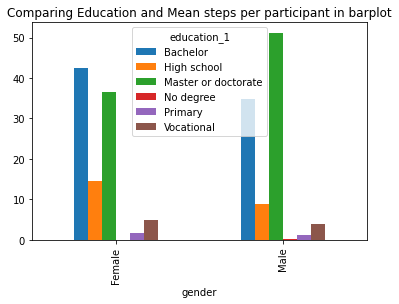

In [32]:
ct = pd.crosstab(df['gender'], df['education_1']).apply(lambda r: r/r.sum()*100, axis=1)
ct.plot.bar(stacked=False)
plt.title('Comparing Education and Mean steps per participant in barplot')
plt.show()